Q1.Difference between simple linear regression and multiple linear regression. 

Simple Linear Regression:
Simple Linear Regression involves a single independent variable (also called a predictor variable) and a single dependent variable. The goal is to find the best-fitting linear relationship between the independent variable and the dependent variable. This relationship is represented by a straight line equation (y = mx + b), where 'y' is the dependent variable, 'x' is the independent variable, 'm' is the slope of the line, and 'b' is the y-intercept.

Example of Simple Linear Regression:

Let's say we want to predict a person's weight ('y') based on their height ('x'). Here, height would be the independent variable, and weight would be the dependent variable.

Multiple Linear Regression:

Multiple Linear Regression involves two or more independent variables and a single dependent variable. It extends the concept of simple linear regression to situations where the relationship between the dependent variable and multiple independent variables is considered. The goal is to find the best-fitting linear equation that represents the relationship between these variables.

Example of Multiple Linear Regression:

Let's consider predicting a person's monthly utility bill ('y') based on two independent variables: square footage of the house ('x1') and the number of occupants ('x2'). Here, we have two independent variables influencing the dependent variable.

Q2. Linear regression makes several assumptions to ensure the validity and reliability of the model's predictions. These assumptions need to be checked when applying linear regression to a dataset.


1.Linearity: The relationship between independent and dependent variables should be linear.


2.Independence: Residuals (the differences between actual and predicted values) should be independent of each other.


3.Homoscedasticity: The variance of residuals should be constant across all levels of the independent variables.


4.Normality of Residuals: Residuals should follow a normal distribution.


5.No Multicollinearity: Independent variables should not be highly correlated with each other.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats


In [6]:
np.random.seed(0)
X = np.random.rand(100, 2)  # Two independent variables
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100)  # Dependent variable with noise

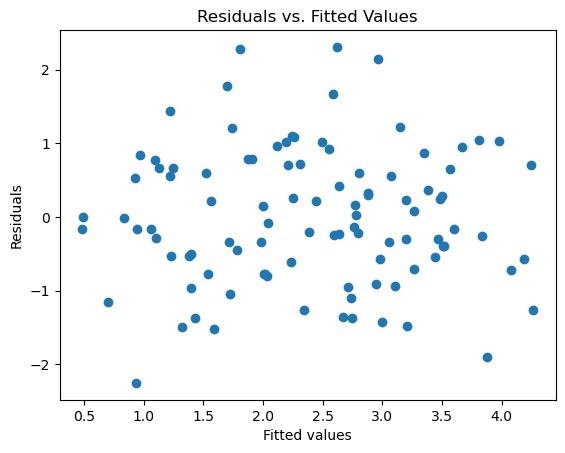

In [7]:
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Residuals
residuals = model.resid
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

In [8]:
# 2. Independence: You can use Durbin-Watson test (values around 2 indicate no autocorrelation)
print("Durbin-Watson statistic:", sm.stats.stattools.durbin_watson(residuals))


Durbin-Watson statistic: 2.044961944363625


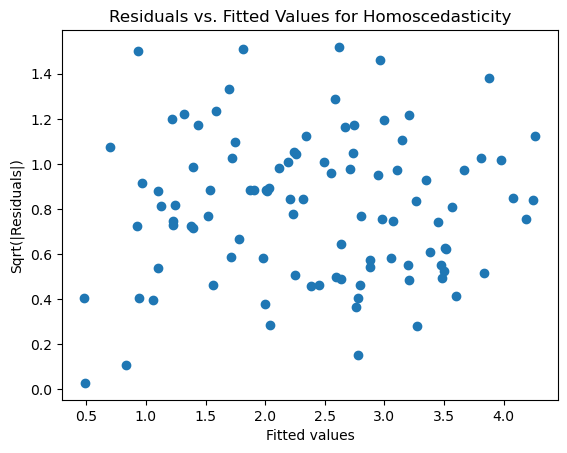

In [9]:
# 3. Homoscedasticity: You can plot residuals against fitted values or perform tests
plt.scatter(model.fittedvalues, np.sqrt(np.abs(residuals)))
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Residuals vs. Fitted Values for Homoscedasticity')
plt.show()


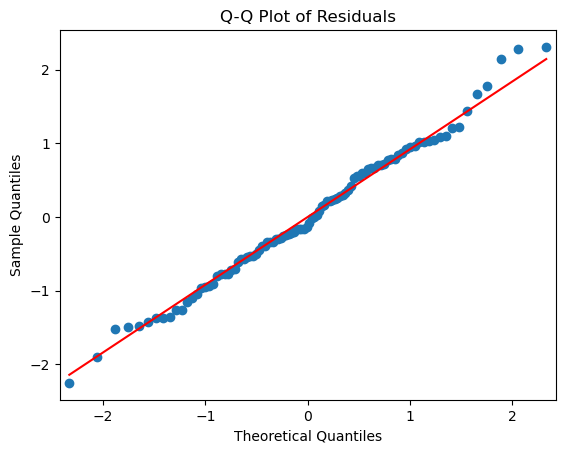

Shapiro-Wilk p-value: 0.7435964345932007


In [10]:
# 4. Normality of Residuals: You can use a Q-Q plot or Shapiro-Wilk test
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()
print("Shapiro-Wilk p-value:", stats.shapiro(residuals)[1])


In [11]:
# 5. No Multicollinearity: You can calculate VIF (Variance Inflation Factor) for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("VIF for each independent variable:", vif)

VIF for each independent variable: [7.695224105655694, 1.0046934191793326, 1.0046934191793326]


Q3. In a linear regression model of the form y = mx + b, the slope (m) and intercept (b) have specific interpretations:

Slope (m): The slope represents the change in the dependent variable (y) for a one-unit change in the independent variable (x). In other words, it indicates how much the dependent variable is expected to increase or decrease when the independent variable changes by one unit, while holding other variables constant.

Intercept (b): The intercept is the value of the dependent variable (y) when the independent variable (x) is zero. It's the point where the regression line crosses the y-axis.

Scenario: Predicting House Prices

Let's say we're working with a dataset of house prices and their corresponding sizes (in square feet).we want to build a linear regression model to predict house prices based on their sizes.

In this case:

Dependent Variable (y): House Price

Independent Variable (x): Size of the House (Square Feet)
Assuming you've fitted a linear regression model to this data and obtained the equation: Price = 100 * Size + 50000 



In [12]:
slope = 100
intercept = 50000

# House size in square feet
house_size = 1500

# Predicting the price using the linear regression equation
predicted_price = slope * house_size + intercept

print("Predicted Price:", predicted_price)

Predicted Price: 200000


Q5.  Describe the multiple linear regression model. How does it differ from simple linear regression?

Multiple Linear Regression is an extension of Simple Linear Regression that allows you to model the relationship between a dependent variable and multiple independent variables. In Simple Linear Regression, you have one independent variable predicting a dependent variable, whereas in Multiple Linear Regression, you have two or more independent variables predicting the same dependent variable.

The equation for Multiple Linear Regression can be represented as:


y = b0 + b1*x1 + b2*x2 + ... + bn*xn

Where:

y is the dependent variable.
b0 is the intercept (the value of y when all independent variables are zero).
b1, b2, ..., bn are the coefficients associated with each independent variable.
x1, x2, ..., xn are the independent variables.

The main differences between Multiple Linear Regression and Simple Linear Regression are:

1. Number of Independent Variables: In Simple Linear Regression, you have only one independent variable. In Multiple Linear Regression, you have two or more independent variables.

2. Equation Complexity: The equation of Multiple Linear Regression includes multiple coefficients and independent variables, making it more complex than the simple equation in Simple Linear Regression.

3. Multidimensional Space: In Multiple Linear Regression, the relationship between the dependent variable and the independent variables is represented in a multidimensional space, which can be harder to visualize.

4. Interpretation of Coefficients: In Multiple Linear Regression, the coefficients (slopes) represent the change in the dependent variable for a unit change in the associated independent variable, while holding other independent variables constant.

5. Assumptions and Challenges: Multiple Linear Regression introduces additional assumptions and challenges. For example, multicollinearity (high correlation between independent variables) can impact the stability and interpretation of coefficients.

6. Real-World Applications: Multiple Linear Regression is used when the relationship between a dependent variable and the outcome is influenced by multiple factors. For example, predicting house prices using not only the size but also the number of bedrooms, location, and other features.








Q7.  Describe the polynomial regression model. How is it different from linear regression

Polynomial Regression is a type of regression analysis that models the relationship between the dependent variable and one or more independent variables as an nth-degree polynomial. It's an extension of linear regression that allows for curved relationships between variables. In Polynomial Regression, the relationship between the variables is expressed as a polynomial equation of the form:

y = b0 + b1*x + b2*x^2 + ... + bn*x^n

Where:

y is the dependent variable.
b0, b1, ..., bn are the coefficients.
x is the independent variable.
n is the degree of the polynomial.

The key differences between Polynomial Regression and Linear Regression are:

1. Linearity vs. Curvature: In Linear Regression, the relationship between variables is assumed to be linear, meaning the data points are best represented by a straight line. In Polynomial Regression, the relationship can be nonlinear, as the polynomial equation can introduce curvature.

2. Degree of the Polynomial: In Linear Regression, the highest degree of the polynomial is 1 (a straight line). In Polynomial Regression, you can choose higher degrees (2, 3, 4, and so on) to capture more complex relationships. However, higher-degree polynomials can lead to overfitting, so careful model selection is necessary.

3. Flexibility and Complexity: Polynomial Regression is more flexible in capturing various types of relationships, including convex and concave curves. However, with increased flexibility comes increased complexity and the potential for overfitting, especially with high-degree polynomials.

4. Interpretation: In Linear Regression, the interpretation of coefficients is relatively straightforward – they represent the change in the dependent variable for a one-unit change in the independent variable. In Polynomial Regression, the interpretation of coefficients becomes more intricate as the degree of the polynomial increases.

5. Polynomial Features: To use Polynomial Regression, you need to transform your input data by adding polynomial features (e.g., squaring the original feature). This process increases the dimensionality of the data.

Polynomial Regression is particularly useful when the relationship between variables appears to be nonlinear. For instance, in scenarios where the rate of change of a variable is not constant across its range, Polynomial Regression can capture these nuances.



Q8 What are the advantages and disadvantages of polynomial regression compared to linear 
regression? In what situations would you prefer to use polynomial regression?

Advantages of Polynomial Regression:

Flexibility: Polynomial Regression can capture complex nonlinear relationships between variables, allowing for more accurate modeling of real-world data that doesn't follow a linear pattern.

Accurate Fitting: When the data exhibits curvature, Polynomial Regression can fit the data more closely, resulting in better predictions within the observed range.

Feature Transformation: By adding polynomial features, you can transform the original features into higher-order terms, potentially improving the model's ability to capture underlying patterns.

Disadvantages of Polynomial Regression:

Overfitting: Higher-degree polynomials can lead to overfitting, where the model captures noise in the data instead of the actual underlying pattern. Careful model selection and regularization are needed to mitigate this risk.

Complexity: As the degree of the polynomial increases, the model becomes more complex and harder to interpret. The interpretation of coefficients becomes less intuitive.

Extrapolation Issues: Polynomial models may not generalize well outside the range of observed data. Extrapolating beyond the data range can lead to unreliable predictions.

When to Use Polynomial Regression:

Polynomial Regression is preferred in the following situations:

Nonlinear Relationships: When the relationship between the dependent and independent variables is clearly nonlinear and a linear model wouldn't accurately capture the underlying pattern.

Curvature in Data: If the scatter plot of data points suggests curvature or deviations from a straight line, Polynomial Regression might be a better choice.

Domain Knowledge: When you have domain knowledge indicating a specific nonlinear relationship between variables, Polynomial Regression can help model that relationship.

Small Data: In cases where you have a relatively small dataset, Polynomial Regression can help capture more details and improve predictions without running the risk of overfitting.

Feature Engineering: Polynomial Regression can be useful for creating higher-order terms and interactions between features, improving the model's ability to fit complex data.

When to Stick with Linear Regression:

Linear Relationships: When the data shows a clear linear relationship between variables, using a linear model simplifies interpretation and avoids unnecessary complexity.

Interpretability: Linear Regression provides straightforward interpretation of coefficients, which can be important when you need to explain the model to stakeholders.

Preventing Overfitting: In situations where the data doesn't exhibit strong curvature, using a linear model can help prevent overfitting and keep the model simpler.

In practice, the choice between Polynomial Regression and Linear Regression depends on the specific characteristics of the data and the objectives of the analysis. Careful consideration of the model's complexity and the underlying patterns in the data is essential to make an informed choice.




